In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Problem Objective :

# Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. 
# You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

# Domain: Entertainment

# Analysis Tasks to be performed:

# Import the three datasets
# Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating.
# (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)
# Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
# User Age Distribution
# User rating of the movie “Toy Story”
# Top 25 movies by viewership rating
# Find the ratings for all the movies reviewed by for a particular user of user id = 2696
# Feature Engineering:
#             Use column genres:

# Find out all the unique genres (Hint: split the data in column genre making a list and 
# then process the data to find out only the unique categories of genres)
# Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie 
# belongs to that genre. 
# Determine the features affecting the ratings of any particular movie.

In [3]:
#importing datasets and mentioned their names ccording to format available in assessment for all the datasets.
movies = pd.read_csv('C:\\Users\\Shree\\movies.dat',sep = "::",engine='python',header=None)
movies.columns = ['MovieID','Title','Genres']
movies
# Format - MovieID::Title::Genres

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [4]:
users = pd.read_csv('C:\\Users\\Shree\\users.dat',sep = "::",engine='python',header = None)
users.columns = ['UserID','Gender','Age','Occupation','Zip-code']
users
#Format -  UserID::Gender::Age::Occupation::Zip-code

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [5]:
ratings = pd.read_csv('C:\\Users\\Shree\\ratings.dat',sep ="::",engine='python',header=None)
ratings.columns= ['UserID','MovieID','Rating','Timestamp']
ratings
# Format - UserID::MovieID::Rating::Timestamp 

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [6]:
#checking any null value presents in all three dataset
movies.isna().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [7]:
ratings.isna().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [8]:
users.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [9]:
data_1= pd.merge(users,ratings,on='UserID',how='inner')
data_1

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291
...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,1091,1,956716541
1000205,6040,M,25,6,11106,1094,5,956704887
1000206,6040,M,25,6,11106,562,5,956704746
1000207,6040,M,25,6,11106,1096,4,956715648


In [10]:
data_2= pd.merge(movies,data_1,on='MovieID',how='inner')
data_2

,MovieID,Title,Genres,UserID,Gender,Age,Occupation,Zip-code,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,F,1,10,48067,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,F,50,9,55117,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,M,25,12,11413,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,M,25,17,61614,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,F,35,1,95370,5,978226474
...,...,...,...,...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",Drama|Thriller,5812,F,25,7,92120,4,992072099
1000205,3952,"Contender, The (2000)",Drama|Thriller,5831,M,25,1,92120,3,986223125
1000206,3952,"Contender, The (2000)",Drama|Thriller,5837,M,25,7,60607,4,1011902656
1000207,3952,"Contender, The (2000)",Drama|Thriller,5927,M,35,14,10003,1,979852537


In [11]:
data_2.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Gender', 'Age', 'Occupation',
       'Zip-code', 'Rating', 'Timestamp'],
      dtype='object')

In [12]:
master_data = data_2[['MovieID','Title','UserID','Age','Gender','Occupation','Rating']]
master_data

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1,Toy Story (1995),1,1,F,10,5
1,1,Toy Story (1995),6,50,F,9,4
2,1,Toy Story (1995),8,25,M,12,4
3,1,Toy Story (1995),9,25,M,17,5
4,1,Toy Story (1995),10,35,F,1,5
...,...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",5812,25,F,7,4
1000205,3952,"Contender, The (2000)",5831,25,M,1,3
1000206,3952,"Contender, The (2000)",5837,25,M,7,4
1000207,3952,"Contender, The (2000)",5927,35,M,14,1


In [13]:
master_data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1,Toy Story (1995),1,1,F,10,5
1,1,Toy Story (1995),6,50,F,9,4
2,1,Toy Story (1995),8,25,M,12,4
3,1,Toy Story (1995),9,25,M,17,5
4,1,Toy Story (1995),10,35,F,1,5


In [14]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   UserID      1000209 non-null  int64 
 3   Age         1000209 non-null  int64 
 4   Gender      1000209 non-null  object
 5   Occupation  1000209 non-null  int64 
 6   Rating      1000209 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 61.0+ MB


In [15]:
master_data.describe()

,MovieID,UserID,Age,Occupation,Rating
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,1.865540e+03,3.024512e+03,2.973831e+01,8.036138e+00,3.581564e+00
std,1.096041e+03,1.728413e+03,1.175198e+01,6.531336e+00,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,1.030000e+03,1.506000e+03,2.500000e+01,2.000000e+00,3.000000e+00
50%,1.835000e+03,3.070000e+03,2.500000e+01,7.000000e+00,4.000000e+00
75%,2.770000e+03,4.476000e+03,3.500000e+01,1.400000e+01,4.000000e+00
max,3.952000e+03,6.040000e+03,5.600000e+01,2.000000e+01,5.000000e+00


In [16]:
master_data['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

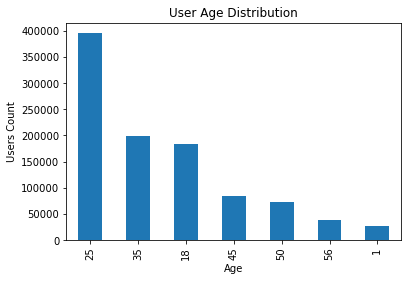

In [17]:
master_data['Age'].value_counts().plot(kind = 'bar')
plt.xlabel("Age")
plt.title("User Age Distribution")
plt.ylabel('Users Count')
plt.show()

25-34 age category are more peoples

In [18]:
#User rating of the movie “Toy Story”
ToyStoryRating = master_data[master_data['Title'].str.contains('Toy Story') == True]
ToyStoryRating

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1,Toy Story (1995),1,1,F,10,5
1,1,Toy Story (1995),6,50,F,9,4
2,1,Toy Story (1995),8,25,M,12,4
3,1,Toy Story (1995),9,25,M,17,5
4,1,Toy Story (1995),10,35,F,1,5
...,...,...,...,...,...,...,...
838274,3114,Toy Story 2 (1999),6022,25,M,17,5
838275,3114,Toy Story 2 (1999),6024,25,M,12,4
838276,3114,Toy Story 2 (1999),6027,18,M,4,4
838277,3114,Toy Story 2 (1999),6036,25,F,15,4


In [19]:
ToyStoryRating.groupby(["Title","Rating"]).size()

Title               Rating
Toy Story (1995)    1          16
                    2          61
                    3         345
                    4         835
                    5         820
Toy Story 2 (1999)  1          25
                    2          44
                    3         214
                    4         578
                    5         724
dtype: int64

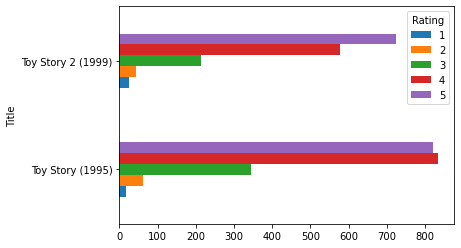

In [20]:
ToyStoryRating.groupby(["Title","Rating"]).size().unstack().plot(kind='barh',stacked=False,legend=True)
plt.show()

In [21]:
#Top 25 movies by viewership rating

Top_25_with_most_rating=master_data.groupby('Title').size().sort_values(ascending=False)[0:25]
Top_25_with_most_rating

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

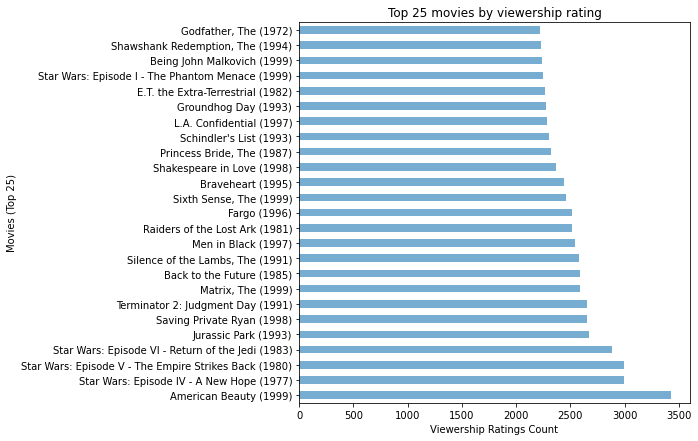

In [22]:
Top_25_with_most_rating.plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.xlabel("Viewership Ratings Count")
plt.ylabel("Movies (Top 25)")
plt.title("Top 25 movies by viewership rating")
plt.show()

In [23]:
# Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [24]:
grouped_by_userid=master_data.groupby('UserID')
grouped_by_userid

In [25]:
user_id_2696=grouped_by_userid.get_group(2696)
user_id_2696.sort_values(by='Rating',ascending=False)

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
200536,800,Lone Star (1996),2696,25,M,7,5
465069,1645,"Devil's Advocate, The (1997)",2696,25,M,7,4
493231,1783,Palmetto (1998),2696,25,M,7,4
270342,1092,Basic Instinct (1992),2696,25,M,7,4
851313,3176,"Talented Mr. Ripley, The (1999)",2696,25,M,7,4
349333,1258,"Shining, The (1980)",2696,25,M,7,4
645948,2389,Psycho (1998),2696,25,M,7,4
507001,1892,"Perfect Murder, A (1998)",2696,25,M,7,4
457193,1617,L.A. Confidential (1997),2696,25,M,7,4
459835,1625,"Game, The (1997)",2696,25,M,7,4


In [26]:
ratings_for_user_id_2696 = user_id_2696['Rating'].value_counts()
ratings_for_user_id_2696

4    11
3     3
2     3
1     2
5     1
Name: Rating, dtype: int64

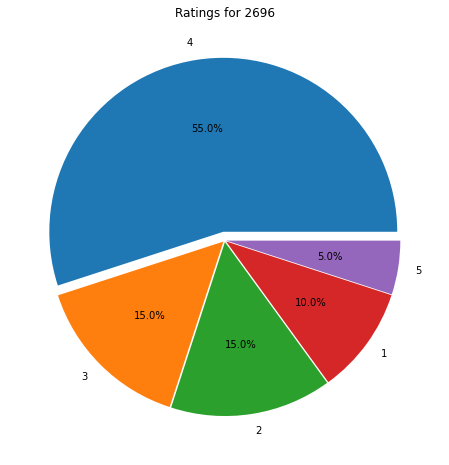

In [27]:
plt.figure(figsize=(8,8))
explode=[0.05,0.01,0.01,0.01,0.01]
plt.pie(ratings_for_user_id_2696,autopct='%1.1f%%',labels=ratings_for_user_id_2696.keys(),explode=explode)
plt.title('Ratings for 2696')
plt.show()

ratings for all the movies reviewed by for a particular user of user id = 2696 as follows
**1)Rating=4, movies=11 **2)Rating=3, movies=3 **3)Rating=2, movies=3  **4)Rating=1, movies=2  **5)Rating=5,movies=1

In [28]:
#Feature Engineering:
 #           Use column genres:

#Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to 
 #                               find out only the unique categories of genres)

In [29]:
data_2['Genres'].unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", "Children's|Comedy",
       'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventure|Crime', 'Crime', 'Drama

In [30]:
Genres = data_2.Genres.str.split('|')
Genres

0          [Animation, Children's, Comedy]
1          [Animation, Children's, Comedy]
2          [Animation, Children's, Comedy]
3          [Animation, Children's, Comedy]
4          [Animation, Children's, Comedy]
                        ...               
1000204                  [Drama, Thriller]
1000205                  [Drama, Thriller]
1000206                  [Drama, Thriller]
1000207                  [Drama, Thriller]
1000208                  [Drama, Thriller]
Name: Genres, Length: 1000209, dtype: object

In [31]:
list_Genres = set()
for i in Genres:
    list_Genres = list_Genres.union(set(i))
    
list_Genres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [32]:
#Genres are pipe-separated and are selected from the following genres:
#Action
#Adventure
#Animation
#Children's
#Comedy
#Crime
#Documentary
#Drama
#Fantasy
#Film-Noir
#Horror
#Musical
#Mystery
#Romance
#Sci-Fi
#Thriller
#War
#Western

In [33]:
RatingsOneHot = data_2['Genres'].str.get_dummies("|")

In [34]:
RatingsOneHot

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1000205,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1000206,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1000207,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [35]:
dfMaster = pd.concat([data_2, RatingsOneHot],axis=1)
dfMaster.head()

,MovieID,Title,Genres,UserID,Gender,Age,Occupation,Zip-code,Rating,Timestamp,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,F,1,10,48067,5,978824268,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),Animation|Children's|Comedy,6,F,50,9,55117,4,978237008,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),Animation|Children's|Comedy,8,M,25,12,11413,4,978233496,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),Animation|Children's|Comedy,9,M,25,17,61614,5,978225952,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),Animation|Children's|Comedy,10,F,35,1,95370,5,978226474,...,0,0,0,0,0,0,0,0,0,0


In [36]:
dfMaster[["title","Year"]] = dfMaster.Title.str.extract("(.)\s\((.\d+)",expand=True)

In [37]:
dfMaster = dfMaster.drop(columns=["title"])
dfMaster.head()

,MovieID,Title,Genres,UserID,Gender,Age,Occupation,Zip-code,Rating,Timestamp,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1,F,1,10,48067,5,978824268,...,0,0,0,0,0,0,0,0,0,1995
1,1,Toy Story (1995),Animation|Children's|Comedy,6,F,50,9,55117,4,978237008,...,0,0,0,0,0,0,0,0,0,1995
2,1,Toy Story (1995),Animation|Children's|Comedy,8,M,25,12,11413,4,978233496,...,0,0,0,0,0,0,0,0,0,1995
3,1,Toy Story (1995),Animation|Children's|Comedy,9,M,25,17,61614,5,978225952,...,0,0,0,0,0,0,0,0,0,1995
4,1,Toy Story (1995),Animation|Children's|Comedy,10,F,35,1,95370,5,978226474,...,0,0,0,0,0,0,0,0,0,1995


In [38]:
dfMaster['Year'] = dfMaster.Year.astype(int)

In [39]:
dfMaster['Movie_Age'] = 2000 - dfMaster.Year
dfMaster.head()

,MovieID,Title,Genres,UserID,Gender,Age,Occupation,Zip-code,Rating,Timestamp,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,F,1,10,48067,5,978824268,...,0,0,0,0,0,0,0,0,1995,5
1,1,Toy Story (1995),Animation|Children's|Comedy,6,F,50,9,55117,4,978237008,...,0,0,0,0,0,0,0,0,1995,5
2,1,Toy Story (1995),Animation|Children's|Comedy,8,M,25,12,11413,4,978233496,...,0,0,0,0,0,0,0,0,1995,5
3,1,Toy Story (1995),Animation|Children's|Comedy,9,M,25,17,61614,5,978225952,...,0,0,0,0,0,0,0,0,1995,5
4,1,Toy Story (1995),Animation|Children's|Comedy,10,F,35,1,95370,5,978226474,...,0,0,0,0,0,0,0,0,1995,5


In [40]:
dfMaster['Gender'] = dfMaster["Gender"].replace({"F":0, "M":1})

In [41]:
dfMaster.head()

,MovieID,Title,Genres,UserID,Gender,Age,Occupation,Zip-code,Rating,Timestamp,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,0,1,10,48067,5,978824268,...,0,0,0,0,0,0,0,0,1995,5
1,1,Toy Story (1995),Animation|Children's|Comedy,6,0,50,9,55117,4,978237008,...,0,0,0,0,0,0,0,0,1995,5
2,1,Toy Story (1995),Animation|Children's|Comedy,8,1,25,12,11413,4,978233496,...,0,0,0,0,0,0,0,0,1995,5
3,1,Toy Story (1995),Animation|Children's|Comedy,9,1,25,17,61614,5,978225952,...,0,0,0,0,0,0,0,0,1995,5
4,1,Toy Story (1995),Animation|Children's|Comedy,10,0,35,1,95370,5,978226474,...,0,0,0,0,0,0,0,0,1995,5


In [42]:
dfGenderAffecting = dfMaster.groupby('Gender').size().sort_values(ascending=False)[:25]

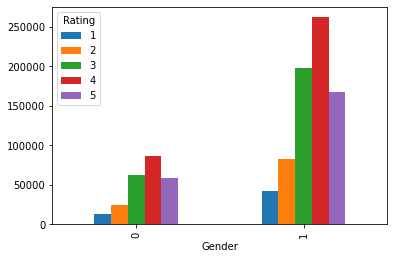

In [43]:
dfMaster.groupby(["Gender","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

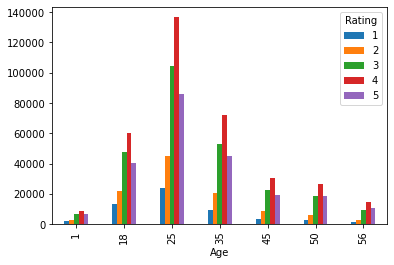

In [44]:
dfMaster.groupby(["Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

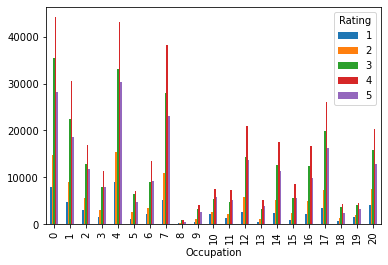

In [45]:
dfMaster.groupby(["Occupation","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

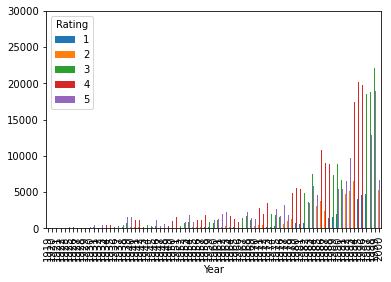

In [46]:
dfMaster.groupby(["Year","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

In [47]:
import matplotlib.pyplot as plt

<Figure size 360x720 with 0 Axes>

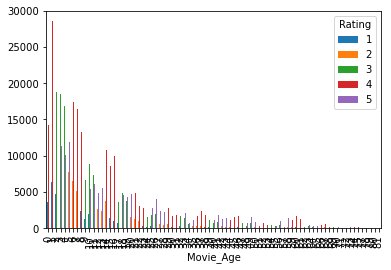

In [48]:
plt.figure(figsize=[5,10])
dfMaster.groupby(["Movie_Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

# Use different Classification Models with Pipeline

In [49]:
dfMaster.head()

,MovieID,Title,Genres,UserID,Gender,Age,Occupation,Zip-code,Rating,Timestamp,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,0,1,10,48067,5,978824268,...,0,0,0,0,0,0,0,0,1995,5
1,1,Toy Story (1995),Animation|Children's|Comedy,6,0,50,9,55117,4,978237008,...,0,0,0,0,0,0,0,0,1995,5
2,1,Toy Story (1995),Animation|Children's|Comedy,8,1,25,12,11413,4,978233496,...,0,0,0,0,0,0,0,0,1995,5
3,1,Toy Story (1995),Animation|Children's|Comedy,9,1,25,17,61614,5,978225952,...,0,0,0,0,0,0,0,0,1995,5
4,1,Toy Story (1995),Animation|Children's|Comedy,10,0,35,1,95370,5,978226474,...,0,0,0,0,0,0,0,0,1995,5


In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
le=LabelEncoder()
dfMaster[["Title","Genres","Zip-code"]] =dfMaster[["Title","Genres","Zip-code"]].apply(le.fit_transform)
print(dfMaster[["Title","Genres","Zip-code"]])

         Title  Genres  Zip-code
0         3411     145      1588
1         3411     145      1863
2         3411     145       488
3         3411     145      2106
4         3411     145      3188
...        ...     ...       ...
1000204    755     260      2924
1000205    755     260      2924
1000206    755     260      2073
1000207    755     260       400
1000208    755     260      2112

[1000209 rows x 3 columns]


In [52]:
dfMaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 30 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   MovieID      1000209 non-null  int64
 1   Title        1000209 non-null  int32
 2   Genres       1000209 non-null  int32
 3   UserID       1000209 non-null  int64
 4   Gender       1000209 non-null  int64
 5   Age          1000209 non-null  int64
 6   Occupation   1000209 non-null  int64
 7   Zip-code     1000209 non-null  int32
 8   Rating       1000209 non-null  int64
 9   Timestamp    1000209 non-null  int64
 10  Action       1000209 non-null  int64
 11  Adventure    1000209 non-null  int64
 12  Animation    1000209 non-null  int64
 13  Children's   1000209 non-null  int64
 14  Comedy       1000209 non-null  int64
 15  Crime        1000209 non-null  int64
 16  Documentary  1000209 non-null  int64
 17  Drama        1000209 non-null  int64
 18  Fantasy      1000209 non-null  int64
 19  

In [53]:
x=dfMaster.drop(["Rating","Genres"],axis=1)
y=dfMaster["Rating"]

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [55]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [56]:
pipeline_log = Pipeline([('logistic',LogisticRegression())])

In [57]:
pipeline_dt = Pipeline([('dt',DecisionTreeClassifier())])

In [58]:
pipelines = [pipeline_log,pipeline_dt]

In [59]:
for pipe in pipelines:
    pipe.fit(xtrain,ytrain)

In [64]:
pipe_dict={0:LogisticRegression, 1:DecisionTreeClassifier}

In [65]:
for i,model in enumerate(pipelines):
    print("{} test accuracy:{} ".format(pipe_dict[i],model.score(xtrain,ytrain)))

<class 'sklearn.linear_model._logistic.LogisticRegression'> test accuracy:0.34883593049950823 
<class 'sklearn.tree._classes.DecisionTreeClassifier'> test accuracy:1.0 


In [66]:
best_accuracy=0
best_classifier=0
best_pipeline=""

In [68]:
for i,model in enumerate(pipelines):
    if model.score(xtrain,ytrain)>best_accuracy:
        best_accuracy = model.score(xtest,ytest)
        best_pipeline=model
        best_classifier=i
print('classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

classifier with best accuracy:<class 'sklearn.tree._classes.DecisionTreeClassifier'>


# Best model for this dataset is Decision Tree Classifier.